# Convolutional neural network
## Answer: Test accuracy: 56%. Convnet performs worse than dense network, probability due to the small dataset size for about a total of 345K parameters instead of 41K parameters in dense network. 

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras
import os

# Create image generator
train_generator = ImageDataGenerator(
    rescale=1/255, horizontal_flip=True, rotation_range=5)
valid_generator = ImageDataGenerator(rescale=1/255) 
test_generator = ImageDataGenerator(rescale=1/255)

trainset = train_generator.flow_from_directory(
    os.path.join('swissroads', 'train'), batch_size=32, target_size=(256, 256),
    shuffle=True)
validset = valid_generator.flow_from_directory(
    os.path.join('swissroads', 'valid'), batch_size=32, target_size=(256, 256),
    shuffle=False)
testset = test_generator.flow_from_directory(
    os.path.join('swissroads', 'test'), batch_size=32, target_size=(256, 256),
    shuffle=False)


Found 280 images belonging to 6 classes.
Found 139 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


In [2]:
# Convolutional Network
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=2,
                              activation='relu', input_shape=(256, 256, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1,
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=trainset.num_classes, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])

# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 345606    
Total params: 387,398
Trainable params: 387,398
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit_generator(
    generator=trainset, validation_data=validset, epochs=100, callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 11s 1s/step - loss: 2.1070 - acc: 0.2242 - val_loss: 1.7504 - val_acc: 0.2374
Epoch 2/100
9/9 [==============================] - 11s 1s/step - loss: 1.7291 - acc: 0.3176 - val_loss: 1.6729 - val_acc: 0.3885
Epoch 3/100
9/9 [==============================] - 12s 1s/step - loss: 1.6053 - acc: 0.4043 - val_loss: 1.5660 - val_acc: 0.4029
Epoch 4/100
9/9 [==============================] - 12s 1s/step - loss: 1.4003 - acc: 0.5104 - val_loss: 1.5254 - val_acc: 0.3669
Epoch 5/100
9/9 [==============================] - 13s 1s/step - loss: 1.1972 - acc: 0.5867 - val_loss: 1.3985 - val_acc: 0.4748
Epoch 6/100
9/9 [==============================] - 12s 1s/step - loss: 0.9960 - acc: 0.6699 - val_loss: 1.3758 - val_acc: 0.4676
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 0.7923 - acc: 0.7301 - val_loss: 1.5786 - val_acc: 0.4101
Epoch 8/100
9/9 [==============================] - 13s 1s/step - loss: 0.6575 - acc: 0.7824 - val

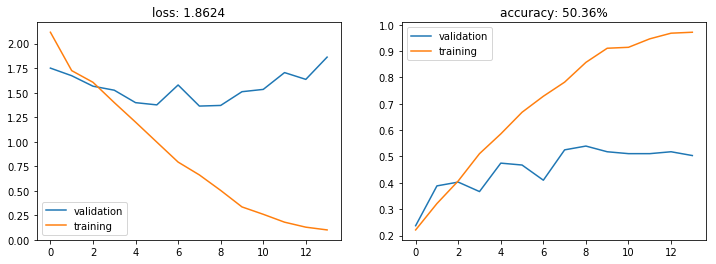

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot loss values
ax1.set_title('loss: {:.4f}'.format(history.history['val_loss'][-1]))
ax1.plot(history.history['val_loss'], label='validation')
ax1.plot(history.history['loss'], label='training')
ax1.legend()

# plot accuracy values
ax2.set_title('accuracy: {:.2f}%'.format(history.history['val_acc'][-1]*100))
ax2.plot(history.history['val_acc'], label='validation')
ax2.plot(history.history['acc'], label='training')
ax2.legend()

plt.show()

### Observation: After Epoch = 3, the training accuracy is higher than validation accuracy, pointing to the direction of overfitting.

In [5]:
(test_loss, test_accuracy) = model.evaluate_generator(generator=testset)

print('Test loss: {:.2f}'.format(test_loss))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) 

Test loss: 1.78
Test accuracy: 50.00%
